In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_load = "data/mouse_drug_data.csv"
clinical_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouseData = pd.read_csv(mouse_load)
clinicalData = pd.read_csv(clinical_load)

# Combine the data into a single dataset
clinicalData = clinicalData.merge(mouseData,on="Mouse ID")

# Display the data table for preview
clinicalData.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [54]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
groupedDrugTime = clinicalData.groupby(['Drug','Timepoint'],as_index=False)

meanTumorVolume = groupedDrugTime.agg({'Tumor Volume (mm3)':'mean'})
meanTumorVolume = meanTumorVolume.rename(columns={'Tumor Volume (mm3)':'Average Tumor Volume (mm3)'})
# Preview DataFrame
meanTumorVolume

,Drug,Timepoint,Average Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [55]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem = clinicalData.groupby(['Drug','Timepoint'],as_index=False).agg({'Tumor Volume (mm3)':'sem'})
semdf = pd.DataFrame(sem)

semdf = semdf.rename(columns={'Tumor Volume (mm3)':'SEM Tumor Volume'})
semdf.head()


,Drug,Timepoint,SEM Tumor Volume
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [56]:
# Minor Data Munging to Re-Format the Data Frames
grouped = clinicalData.pivot_table(values='Tumor Volume (mm3)', index='Timepoint', columns='Drug', aggfunc=np.mean)
grouped.head()
# Preview that Reformatting worked

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


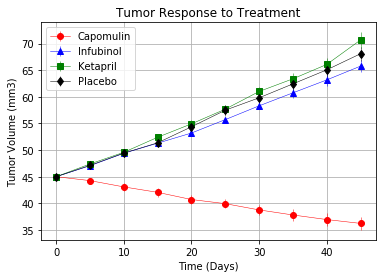

In [57]:
# Generate the Plot (with Error Bars)
capoErr = [semdf['SEM Tumor Volume'].iloc[idx] for idx,drug in enumerate(semdf['Drug']) if drug=="Capomulin"]
infuErr = [semdf['SEM Tumor Volume'].iloc[idx] for idx,drug in enumerate(semdf['Drug']) if drug=="Infubinol"]
ketaErr = [semdf['SEM Tumor Volume'].iloc[idx] for idx,drug in enumerate(semdf['Drug']) if drug=="Ketapril"]
placErr = [semdf['SEM Tumor Volume'].iloc[idx] for idx,drug in enumerate(semdf['Drug']) if drug=="Placebo"]
plt.errorbar(grouped.index,grouped['Capomulin'],yerr=capoErr,color="red",label="Capomulin",marker='o',linewidth=0.5)
plt.errorbar(grouped.index,grouped['Infubinol'],yerr=infuErr,color="blue",label="Infubinol",marker='^',linewidth=0.5)
plt.errorbar(grouped.index,grouped['Ketapril'],yerr=ketaErr,color="green",label="Ketapril",marker='s',linewidth=0.5)
plt.errorbar(grouped.index,grouped['Placebo'],yerr=placErr,color="black",label="Placebo",marker='d',linewidth=0.5)
plt.grid()
plt.legend()
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Response to Treatment")
# Save the Figure
plt.savefig('Tumor Response to Treatment')

plt.show()

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metaGroup = clinicalData.groupby(['Drug','Timepoint'])
metatodf = metaGroup.agg({'Metastatic Sites':'mean'})

# Preview DataFrame
metatodf.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metaSEM = clinicalData.groupby(['Drug','Timepoint'],as_index=False).agg({'Metastatic Sites':'sem'})
metaSEM.head()
# Preview DataFrame


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [58]:
# Minor Data Munging to Re-Format the Data Frames
metaPivot = clinicalData.pivot_table(values='Metastatic Sites', index='Timepoint', columns='Drug', aggfunc=np.mean)
metaPivot.head()
# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


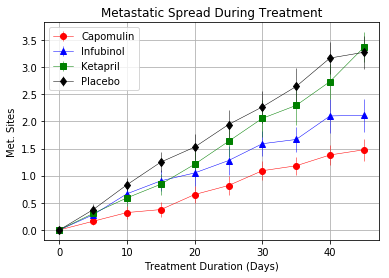

In [10]:
metacapoErr = [metaSEM['Metastatic Sites'].iloc[idx] for idx,drug in enumerate(metaSEM['Drug']) if drug=="Capomulin"]
metainfuErr = [metaSEM['Metastatic Sites'].iloc[idx] for idx,drug in enumerate(metaSEM['Drug']) if drug=="Infubinol"]
metaketaErr = [metaSEM['Metastatic Sites'].iloc[idx] for idx,drug in enumerate(metaSEM['Drug']) if drug=="Ketapril"]
metaplacErr = [metaSEM['Metastatic Sites'].iloc[idx] for idx,drug in enumerate(metaSEM['Drug']) if drug=="Placebo"]
plt.errorbar(metaPivot.index,metaPivot['Capomulin'],yerr=metacapoErr,color="red",label="Capomulin",marker='o',linewidth=0.5)
plt.errorbar(metaPivot.index,metaPivot['Infubinol'],yerr=metainfuErr,color="blue",label="Infubinol",marker='^',linewidth=0.5)
plt.errorbar(metaPivot.index,metaPivot['Ketapril'],yerr=metaketaErr,color="green",label="Ketapril",marker='s',linewidth=0.5)
plt.errorbar(metaPivot.index,metaPivot['Placebo'],yerr=metaplacErr,color="black",label="Placebo",marker='d',linewidth=0.5)
plt.grid()
plt.legend()
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.title("Metastatic Spread During Treatment")
# Save the Figure
plt.savefig('Metastatic Spread During Treatment')

## Survival Rates

In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
countGroup = clinicalData.groupby(['Drug','Timepoint'],as_index=False)
countdf = countGroup.agg({'Mouse ID':'count'})
countdf.rename(columns={'Mouse ID':'Mouse Count'})
# Convert to DataFrame
countdf.head()
# Preview DataFrame


,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [12]:
# Minor Data Munging to Re-Format the Data Frames
mousePivot = clinicalData.pivot_table(values='Mouse ID', index='Timepoint', columns='Drug', aggfunc='count')
# Preview the Data Frame
mousePivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


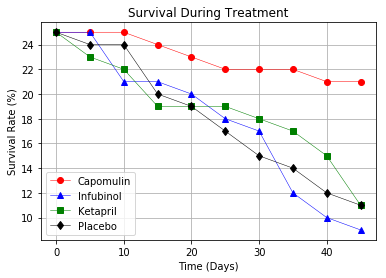

In [13]:
# Generate the Plot (Accounting for percentages)
plt.plot(mousePivot.index,mousePivot['Capomulin'],color="red",label="Capomulin",marker='o',linewidth=0.5)
plt.plot(mousePivot.index,mousePivot['Infubinol'],color="blue",label="Infubinol",marker='^',linewidth=0.5)
plt.plot(mousePivot.index,mousePivot['Ketapril'],color="green",label="Ketapril",marker='s',linewidth=0.5)
plt.plot(mousePivot.index,mousePivot['Placebo'],color="black",label="Placebo",marker='d',linewidth=0.5)
plt.grid()
plt.legend()
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate (%)')
plt.title("Survival During Treatment")
# Save the Figure
plt.savefig("Survival During Treatment")
# Show the Figure
plt.show()

## Summary Bar Graph

In [14]:
# Calculate the percent changes for each drug
#First group by drug and timepoint once more to get a cleaner set
summarydf = clinicalData.groupby(['Drug','Timepoint']).agg({'Tumor Volume (mm3)': 'mean'})

drugCount = 1
volCount = 0
percents = []

startVol = 0.0
endVol = 0.0

for idx, each in enumerate(summarydf['Tumor Volume (mm3)']):
    volCount+=1
    if volCount==1:
        startVol = each
    elif volCount==10:
        endVol = each
        percent = 100*(endVol-startVol)/startVol
        #Choose only the drugs that we care about
        percents.append(percent)
        volCount=0
        drugCount+=1
# Display the data to confirm
d = summarydf.index.get_level_values('Drug').unique()
datadf = pd.DataFrame(d)
datadf['Percent Change'] = percents
listdf=datadf.set_index('Drug')
print(listdf)

           Percent Change
Drug                     
Capomulin      -19.475303
Ceftamin        42.516492
Infubinol       46.123472
Ketapril        57.028795
Naftisol        53.923347
Placebo         51.297960
Propriva        47.241175
Ramicane       -22.320900
Stelasyn        52.085134
Zoniferol       46.579751


Passing: ['Capomulin'] : [-19.47530266789416]
Failing: ['Ceftamin', 'Infubinol', 'Ketapril'] : [46.123471727851836, 57.02879468660604, 51.29796048315153]


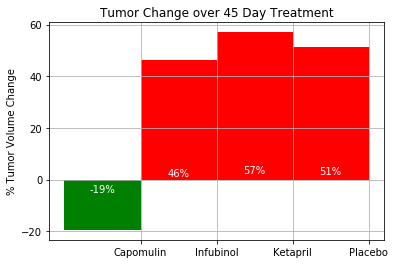

In [51]:
# Store all Relevant Percent Changes into a Tuple
tuplePercent = ()
for idx,each in enumerate(percents):
    if idx==0 or idx==2 or idx==3 or idx==5:
        tuplePercent = tuplePercent + (each,)
listDrugs = datadf['Drug']

# Splice the data between passing and failing drugs
passing = [listDrugs[idx] for idx,x in enumerate(tuplePercent) if x<0]
failing = [listDrugs[idx] for idx,x in enumerate(tuplePercent) if x>0]

passingPercent = [x for x in tuplePercent if x<0]
failingPercent = [x for x in tuplePercent if x>0]
print(f"Passing: {passing} : {passingPercent}")
print(f"Failing: {failing} : {failingPercent}")

tuplePercent #yaxis
x_axis = range(4) #xaxis
xlabels = ['Capomulin','Infubinol','Ketapril','Placebo']
formattedPercent = ["{0:.0f}%".format(num) for num in tuplePercent] #labels

# Orient widths. Add labels, tick marks, etc. 
fig,ax=plt.subplots()
barlist = ax.bar(x_axis,tuplePercent,width=-1,color=['g','r','r','r'],align='edge')
ax.grid()
plt.xticks(x_axis,xlabels)
plt.yticks(np.arange(-20,70,20))
plt.title("Tumor Change over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")

# Use functions to label the percentages of changes
def autolabel(bars):
    labelcount = 0
    for eachbar in bars:
        height = eachbar.get_height()
        ax.text(eachbar.get_x() + eachbar.get_width()/2., 0.1*height,
               formattedPercent[labelcount],
                ha='center',va='top',
               color='white', fontname='Helvetica')
        labelcount+=1
# Call functions to implement the function calls
autolabel(barlist)

# Save the Figure
fig.savefig("Summary Bar Tumor Change")

# Show the Figure
fig.show()
#end of homework, done